In [1]:
from datetime import date
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
todaysdate =date.today().strftime('%Y-%m-%d')
todaysdate

'2020-05-04'

In [3]:
URL = 'https://coinmarketcap.com/currencies/bitcoin/'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
results= soup.find('span', class_='cmc-details-panel-price__price')
results

<span class="cmc-details-panel-price__price">$8,759.86</span>

In [4]:
btc_price=results.text
btc_price

'$8,759.86'

In [5]:
btc_price=btc_price.replace(',','').replace('$','')
btc_price=float(btc_price)
btc_price

8759.86

In [6]:
df=pd.read_csv('BTC_price_history.csv')
df.head()

,Date,Open*,Single_day_Increase(%),Sixty_Days_Increase(%)
0,2013-4-28,135.30,0.0000,0.0
1,2013-4-29,134.44,-0.6356,0.0
2,2013-4-30,144.00,7.1110,0.0
3,2013-5-1,139.00,-3.4722,0.0
4,2013-5-2,116.38,-16.2734,0.0


In [7]:
Single_day_Increase=(btc_price- df.iloc[-1]['Open*'])/df.iloc[-1]['Open*']*100
Single_day_Increase=round(Single_day_Increase,4)
Single_day_Increase

-2.6745

In [8]:
sixty_days=df.iloc[-59:]['Single_day_Increase(%)']
Sixty_Days_Increase=sum(sixty_days)+Single_day_Increase
Sixty_Days_Increase

15.619100000000001

In [9]:
data=pd.DataFrame({'Date':[todaysdate],'Open*':[btc_price],'Single_day_Increase(%)':[Single_day_Increase],'Sixty_Days_Increase(%)':[Sixty_Days_Increase]})
df=df.append(data)
df.to_csv('BTC_price_history.csv',index=False)

In [10]:
import matplotlib.pyplot as plt

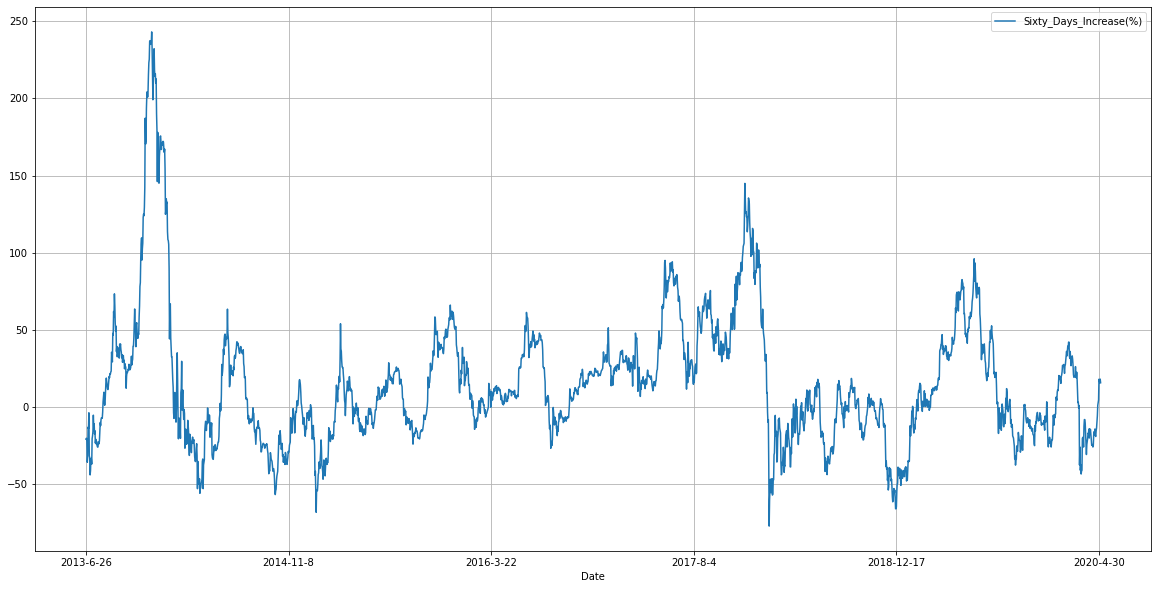

In [21]:
data_plt=df[['Date','Sixty_Days_Increase(%)']]
data_plt=data_plt[59:]
data_plt.plot(kind='line', x='Date', y='Sixty_Days_Increase(%)', ax= plt.gca(), grid=True,figsize = (20,10))
plt.savefig('BTC_Sixty_Days_Increase.png')
plt.show()